In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [3]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu102 (Tesla T4)


In [4]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-b97440df-a3cb-142c-6c79-4a7454dbb290)


# 1. Inference

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`.

In [ ]:
!python detect.py --weights runs/train/exp/weights/last.pt --img 640 --conf 0.35 --source ../video.mp4 # Testing the Django Unchained video

Streaming output truncated to the last 5000 lines.
video 1/1 (467/5464) /content/yolov5/../video.mp4: 384x640 Done. (0.007s)
video 1/1 (468/5464) /content/yolov5/../video.mp4: 384x640 Done. (0.007s)
video 1/1 (469/5464) /content/yolov5/../video.mp4: 384x640 Done. (0.007s)
video 1/1 (470/5464) /content/yolov5/../video.mp4: 384x640 Done. (0.007s)
video 1/1 (471/5464) /content/yolov5/../video.mp4: 384x640 Done. (0.008s)
video 1/1 (472/5464) /content/yolov5/../video.mp4: 384x640 Done. (0.007s)
video 1/1 (473/5464) /content/yolov5/../video.mp4: 384x640 Done. (0.009s)
video 1/1 (474/5464) /content/yolov5/../video.mp4: 384x640 Done. (0.007s)
video 1/1 (475/5464) /content/yolov5/../video.mp4: 384x640 Done. (0.007s)
video 1/1 (476/5464) /content/yolov5/../video.mp4: 384x640 Done. (0.007s)
video 1/1 (477/5464) /content/yolov5/../video.mp4: 384x640 Done. (0.007s)
video 1/1 (478/5464) /content/yolov5/../video.mp4: 384x640 Done. (0.007s)
video 1/1 (479/5464) /content/yolov5/../video.mp4: 384x640 Do

# 2. Train

Download [COCO128](https://www.kaggle.com/ultralytics/coco128), a small 128-image tutorial dataset, start tensorboard and train YOLOv5s from a pretrained checkpoint for 3 epochs (note actual training is typically much longer, around **300-1000 epochs**, depending on your dataset).

In [6]:
# Train YOLOv5s on COCO128 for 60 epochs
!python train.py --img 640 --batch 16 --epochs 60 --data my_data.yaml --weights yolov5s.pt --cache 

train: weights=yolov5s.pt, cfg=, data=my_data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=60, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1, freeze=0
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-370-gdbc06ce torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspec

# 3. Visualize

## Local Logging

All results are logged by default to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc. View train and test jpgs to see mosaics, labels, predictions and augmentation effects. Note a **Mosaic Dataloader** is used for training (shown below), a new concept developed by Ultralytics and first featured in [YOLOv4](https://arxiv.org/abs/2004.10934).

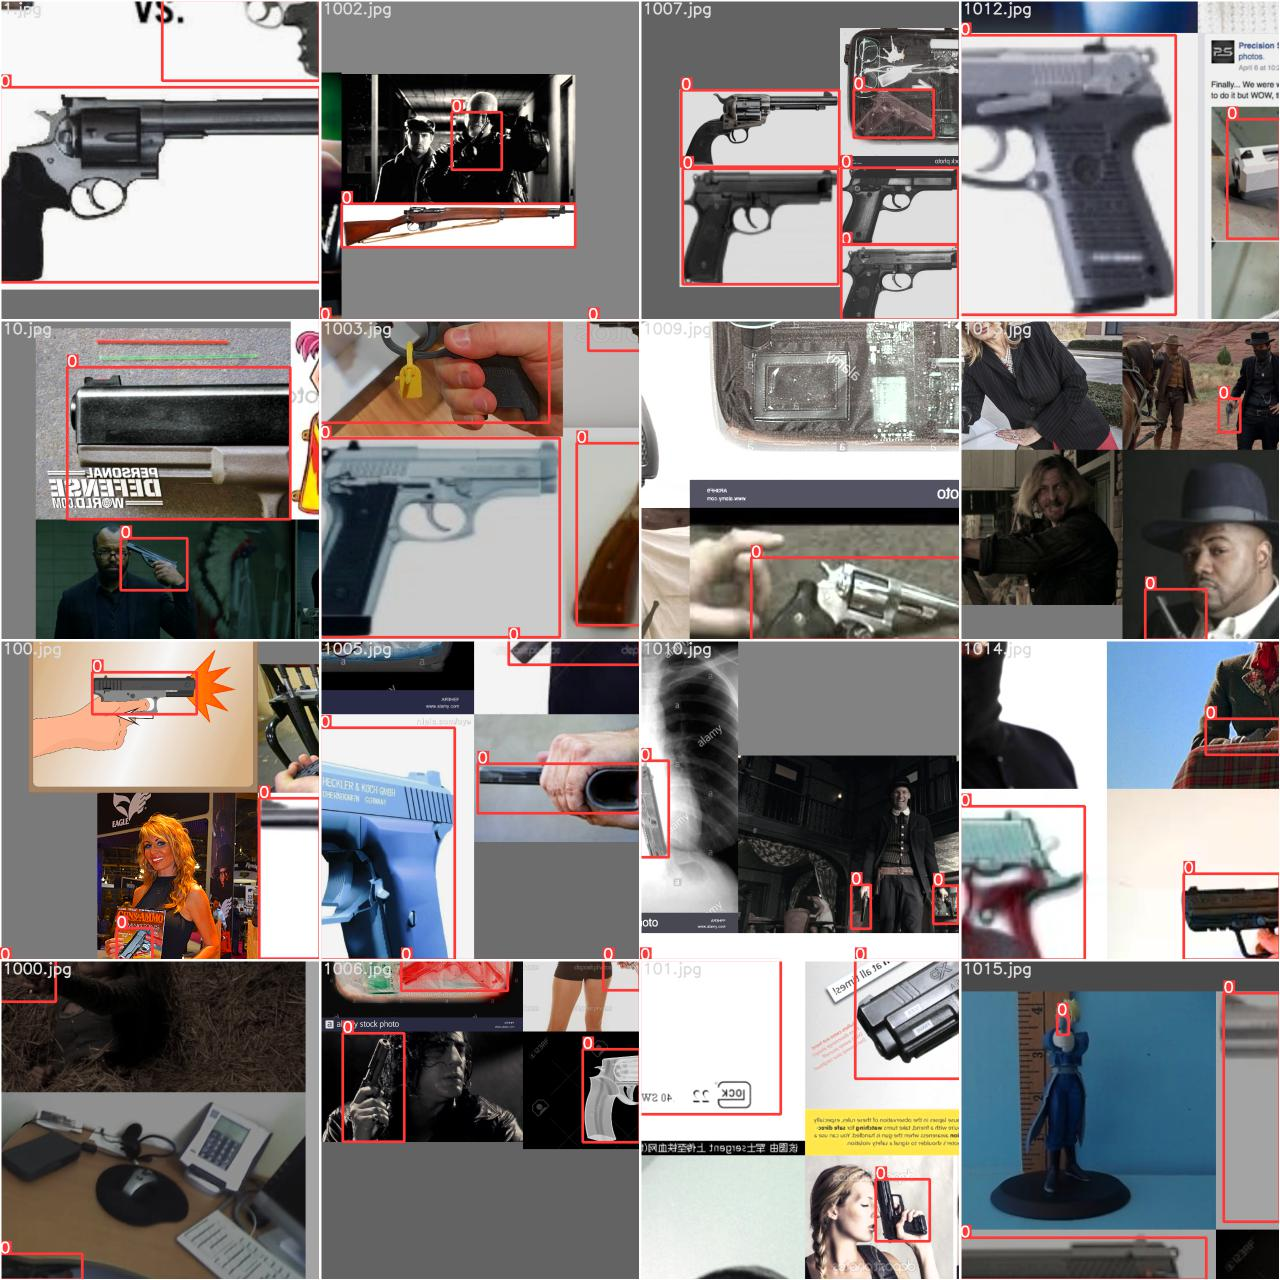

In [8]:
Image(filename='runs/train/exp/train_batch0.jpg', width=800)  # train batch 0 mosaics and labels

In [ ]:
Image(filename='runs/train/exp/val_batch0_labels.jpg', width=800)  # test batch 0 labels

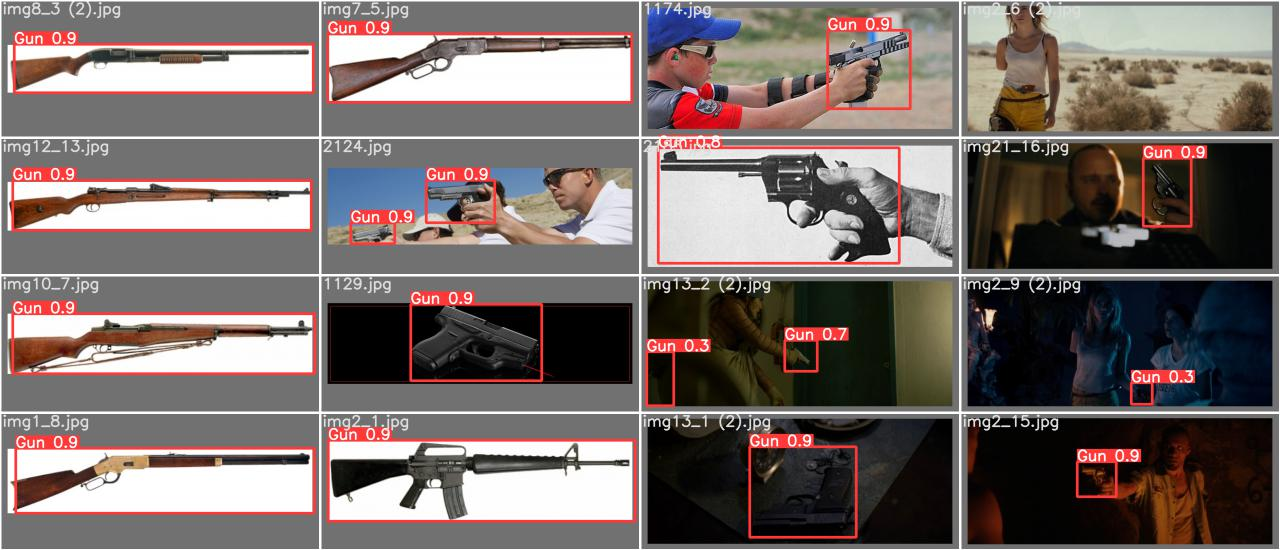

In [11]:
Image(filename='runs/train/exp/val_batch0_pred.jpg', width=800)  # test batch 0 predictions

In [ ]:
Image(filename='runs/train/exp/val_batch1_labels.jpg', width=800)  # test batch 1 labels

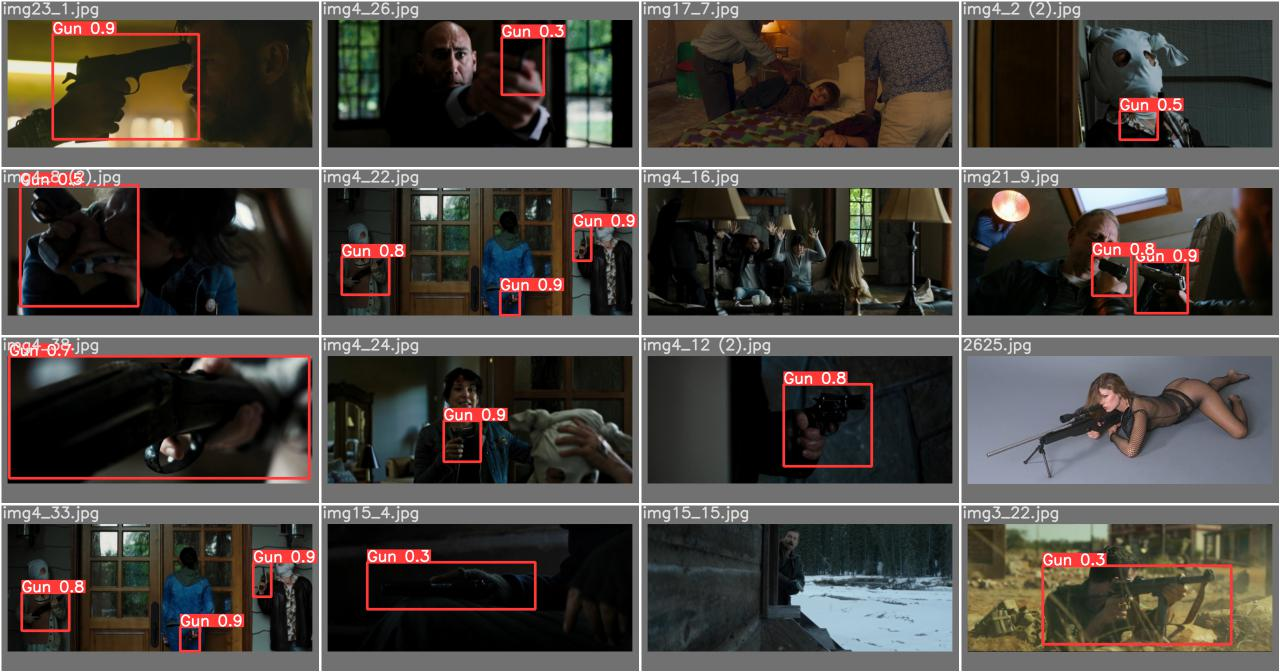

In [14]:
Image(filename='runs/train/exp/val_batch1_pred.jpg', width=800)  # test batch 1 predictions

In [ ]:
Image(filename='runs/train/exp/val_batch2_labels.jpg', width=800)  # test batch 2 labels

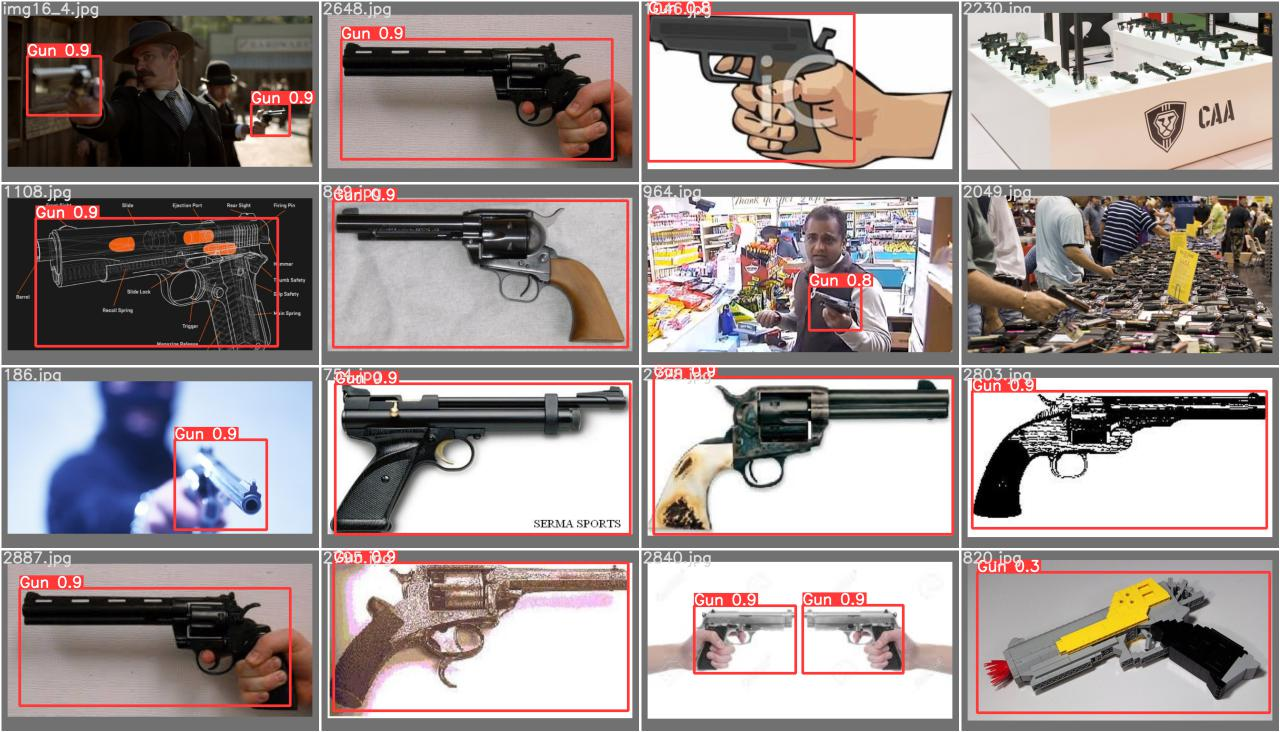

In [15]:
Image(filename='runs/train/exp/val_batch2_pred.jpg', width=800)  # test batch 2 predictions